In [38]:
import numpy as np 
from matplotlib import pyplot as plt
from IPython.display import Image, display 
import pandas as pd 
import glob 
import re
import random 
import seaborn as sns

random.seed(2023)

<font size=4 color='violet'>
    
## Elizabeth Rubio Juárez

## Tarea 2: Análisis de datos
### Ciencia de datos para físicos: Facultad de ciencias, UNAM
#### Profesores: Karen Rubí Jiménez-López, Pedro Arturo Flores-Silva

**Instrucciones:** Plantear hipótesis y/o preguntas que deberás responder a través de tu análisis. Dichas hipótesis/preguntas/ideas/pensamientos debes anotarlas en celdas tipo markdown.

Restricciones:
* Mínimo 3 gráficas e interpretarlas
* Mínimo 2 Tablas e interpretarlas
* Máximo 7 ejercicios en total 
* Documentar el código
* Procura que tus ideas/hipótesis/preguntas sean claras 
* Subir código y dataset al github. Responder con usuario (mismo procedimiento que la tarea anterior)
* Elegir datasets que sean tipo tabular

La base de datos que elegí es "NASA Exoplanets", es un catálogo completo de los Exoplanetas descubiertos por las misiones de la NASA. Esta base posee los siguientes atributos: 

* name: nombre del planeta dado por la NASA.

* distance: distancia del planeta a la tierra en años luz. 

* stellar_magnitude: brillo del planeta, cuanto más brillante es el planeta, menor número se asigna al planeta.

* planet_type: tipo de planeta, estos tipos se derivan de los planetas de nuestro sistema solar (se parece a tal planeta).

* discovery_year: año en el cual se descubrió el planeta.

* mass_multiplier: multiplicador de masa del planeta con el valor mass_wrt del planeta.

* mass_wrt: masa del planeta en comparación con la masa de los planetas de nuestro sistema solar.

* radius_multiplier: multiplicador de radio del planeta con el valor radius_wrt del planeta.

* radius_wrt: radio del planeta en comparación con el radio de los planetas de nuestro sistema solar.

* orbital_radius: radio orbital de los planetas que orbitan alrededor de su sol (en AU).

* orbital_period: tiempo en años que tardan esos planetas en completar 1 órbita de su estrella.

* eccentricity: la excentricidad básicamente dice qué tan circular es la trayectoria orbital.

* detection_method: método utilizado por la NASA para encontrar ese exoplaneta. 

In [39]:
""" El conjunto de datos se encuentra en un archivo .csv, el cual es tabular y similar a un .xls (excel)
Los datos se leen con la libreria pandas como sigue""" 
data = pd.read_csv('cleaned_5250.csv')

In [40]:
"""El objeto data contiene una tabla con los datos anteriores, la tabla tiene una cabecera o header"""
data #Visualizamos la base de datos

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


En total se poseen 5250 filas y 13 columnas, es decir, se tienen datos de 5250 exoplanetas con sus respectivos 13 atributos. 

## 1. Primero es importante entender el tipo al que pertenece cada columna, es decir si es númerica o categórica. Saber si existen valores nulos o no. Para esto usaremos la función `info()` de pandas.

In [41]:
"""Tipo de variable que es cada atributo"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


La columna Dtype nos da una idea del tipo de dato que contiene la columna. El hecho de que sea float no significa que la variable es necesariamente continua, puede ser discreta.

Observemos que las columnas `name`, `planet_type`, `mass_wrt`, `radius_wrt` y `detection_method` son tipo `object`, esto significa que son variables categórica. El tipo object es el tipo genérico de pandas, que puede contener cualquier tipo de dato (listas, strings, diccionarios, etc).

Notamos que hay valores nulos dado que no todas las columnas poseen 5250 datos. Lo más probable, es que estos valores nulos se deben a que no se lograrón determinar.

In [42]:
"""Usamos isna() y sum() para obtener los valores nulos de las columnas"""
data.isna().sum()


name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

Tenemos que en `distance` faltan 17, en `stellar_magnitude` faltan 161, en `mass_multiplier` y `mass_wrt` faltan 23, en `radius_multiplier` y en `radius_wrt` faltan 17, y en `orbital_radius` faltan 289. 

Para ellos podemos tomar dos caminos: 1) eliminar aquellas filas que contengan al menos un valor nulo, sabiendo que esa información se pierde. 2) reemplazar los valores nulos por algún valor, por ejemplo, la media de la columna, este método podría introducir algún sesgo en los datos. 

En este caso, vamos a eliminar aquellas filas que contengan al menos un valor nulo. La justificación de esta decisión se cimenta en el hecho de que algunos atributos tienen mayor relación con otros y es algo que se quiere analizar, además, no queremos introducir algún sesgo en los datos.

In [43]:
"""Renombramos como datos, este DataFrame ya no tiene filas con valores nulos"""
datos = data.dropna()
datos

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


Con lo anterior, ahora tenemos 4765 exoplanetas con sus respectivos 13 atributos.

## 2. Si consideramos un exoplaneta, ¿cuál es el año más probable en el que se descubrió?

Veamos ahora si existen outliers y el rango intercuartilíco con un boxplot, para ello usamos `describe()`. Este método nos da un resumen estadístico de las columnas numéricas (los rangos intercuartilícos, la desviación estandár y la media), este método no incluye las columnas categóricas, ya que no tiene sentido calcular la media, la desviación estándar, etc. de una variable categórica. Para forzarlo a que incluya las columnas categóricas, debemos pasarle el parámetro `include='all'`.

In [44]:
"""Obtenemos la descripción general de las variables que no son categoricas"""
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,4765.0,1796.385519,1813.067120,4.000000,358.000000,1386.000000,2741.000000,27727.00
stellar_magnitude,4765.0,12.692694,3.150680,0.872000,10.883000,13.629000,15.061000,44.61
discovery_year,4765.0,2015.484365,4.229611,1995.000000,2014.000000,2016.000000,2018.000000,2023.00
mass_multiplier,4765.0,6.424598,13.392832,0.027500,1.790000,4.190000,8.050000,752.00
radius_multiplier,4765.0,1.014006,0.608620,0.200000,0.317000,1.120000,1.420000,6.90
orbital_radius,4765.0,6.622956,140.539995,0.005800,0.052300,0.098700,0.243000,7506.00
orbital_period,4765.0,480.023422,17542.984437,0.000548,0.012594,0.033128,0.124025,1101369.90
eccentricity,4765.0,0.067635,0.145240,-0.520000,0.000000,0.000000,0.068000,0.95


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdba1f9f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdba1f9f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdba1f9f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdba1f9fe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdba1f6c3d0>],
 'means': [<matplotlib.lines.Line2D at 0x7fdba1f6c130>]}

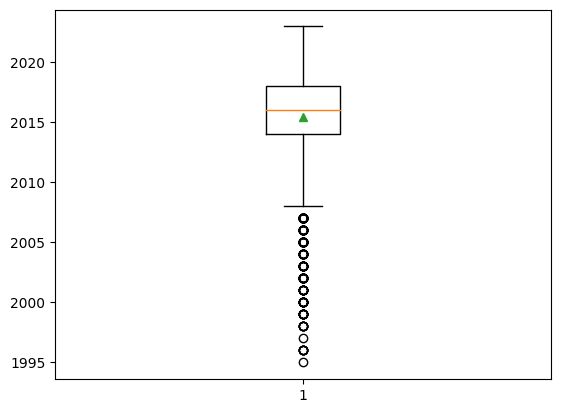

In [45]:
"""boxplot sobre el año de descubrimiento de los exoplanetas"""
plt.boxplot(datos['discovery_year'], showmeans=True)

La interpretación de las Q's es la siguiente:
* El 25% de los exoplanetas fueron descubiertos en 2014.
* El 50% de los exoplanetas fueron descubiertos en 2016.
* El 75% de los exoplanetas fueron descubiertos en 2018.

## 3. ¿Cuál es el método de detección más utilizado por la NASA? 

<Axes: ylabel='detection_method'>

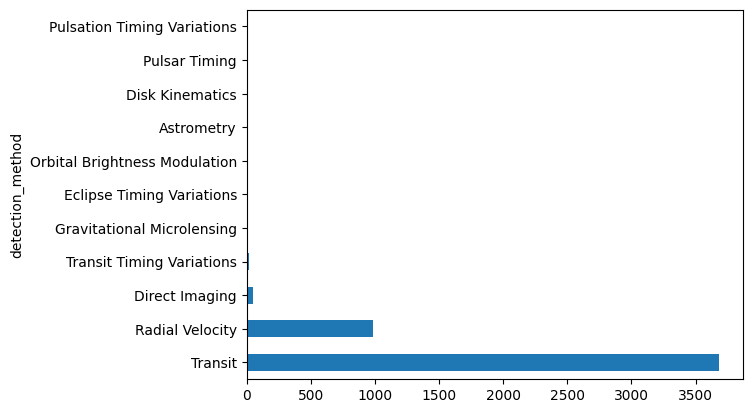

In [46]:
"""Histograma para saber cuál es el método de detección más utilizado por la NASA"""
datos['detection_method'].value_counts().plot.barh()

De acuerdo a la gráfica anterior, el método de detección más utilizado por la NASA es el método del tránsito. Cuando un planeta pasa delante de su estrella, esto se llama tránsito. Cuando el planeta transita frente a la estrella, cubre un poco su luz. Eso significa que la estrella se verá un poco menos brillante cuando el planeta pase por delante de ella.

## 4. Hipótesis: Se tienen más exoplanetas con masa similar a la de Júpiter. 

<Axes: ylabel='mass_wrt'>

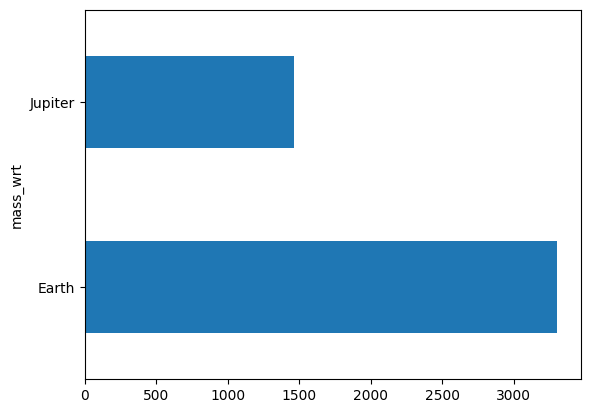

In [47]:
"""Histograma para saber si hay exoplanetas más tipo masa de Júpiter"""
datos['mass_wrt'].value_counts().plot.barh()

Se tiene registro de más planetas con masa similar a la de la Tierra; se tienen aproximadamente 3600. 

## 5. Hipótesis: Existen menos exoplanetas tipo Super Earth.

In [48]:
"""Conteo de los tipos de exoplanetas que hay"""
datos['planet_type'].value_counts()

planet_type
Neptune-like    1670
Super Earth     1477
Gas Giant       1435
Terrestrial      183
Name: count, dtype: int64

Con lo anterior, la hipótesis se niega puesto que existen menos exoplanetas tipo Terrestrial. Los cuales son exoplanetas que tienen entre la mitad del tamaño de la Tierra y el doble de su radio y otros pueden ser incluso más pequeños.

## 6. ¿Cuál es la excentricidad de la mayoría de las órbitas de los exoplanetas? 

<Axes: ylabel='Frequency'>

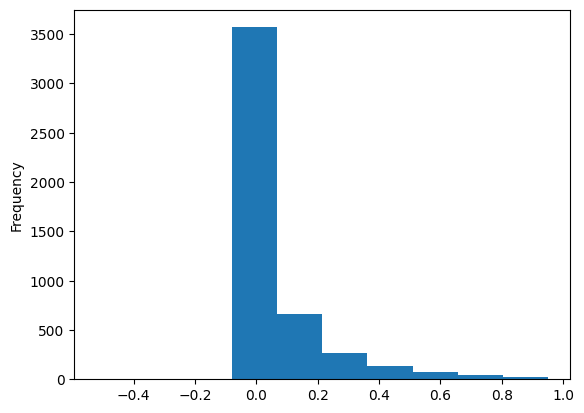

In [49]:
"""Histograma para encontrar cuál excentricidad tiene la mayoría de órbitas de los exoplanetas"""
datos['eccentricity'].plot(kind='hist')

De la gráfica anterior se observa que la mayoría de los exoplanetas siguen trayectorias orbitales circulares, pues están son de excentricidad 0.

## 7. ¿Cómo se relacionan `orbital_period`, `orbital_radius` y `radius_wrt`?

El analísis multivariado nos permite combinar $n$ variables continuas y catogóricas. En este caso, `orbital_period` y `orbital_radius` son variables continuas y `radius_wrt` es una variable categórica. 

<Axes: xlabel='orbital_radius', ylabel='orbital_period'>

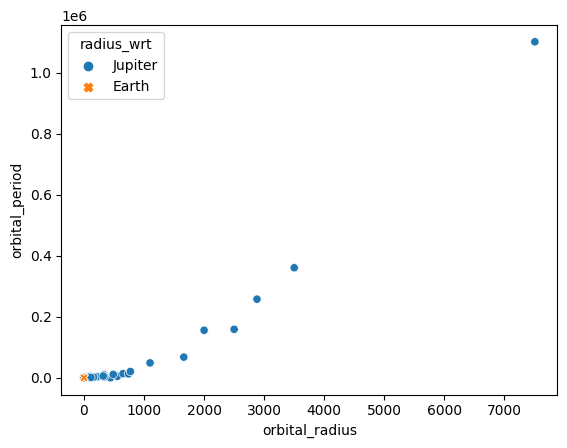

In [50]:
"""Scatterplot de 2 variables continua y una categórica"""
sns.scatterplot(x = "orbital_radius", y = "orbital_period", hue = "radius_wrt", style = "radius_wrt",data = datos)

Del gráfico anterior se tiene que entre menores son el radio orbital y el periodo orbital, el exoplaneta tiene un radio similar al de la Tierra. En el caso contrario (mayores valores de periodo orbital y radio orbital), el exoplaneta tiene un radio similar al de Júpiter. 

Se tiene una mayor densidad de exoplanetas con radio similar al de Júpiter. 

# Bloopers

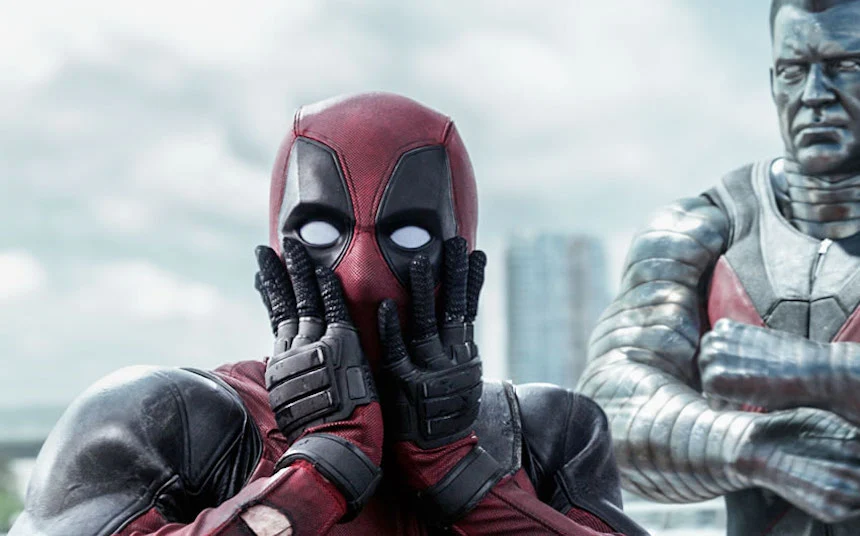

In [51]:
display(Image("deadpool-bloopers.png"))

* Use alrededor de 4 bases de datos antes de encontrar esta base dado que me deje llevar por las que tenían "Gold". 

* Primero borre dos columnas: `stellar_magnitude` y `orbital_radius`. Pero usando heatmap me di cuenta de que estaban altamente relacionadas con otras variables, lo cual era algo que quería analizar. Entonces remende mi error solo eliminando las filas que tenían valores nulos. De los 5250 exoplanetas solo me quede con 4765. 

Adjunto evidencia. 

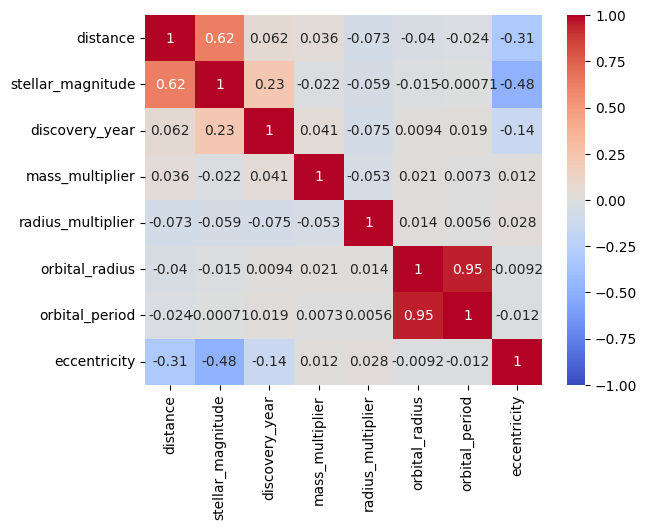

In [52]:
sns.heatmap(datos.corr(numeric_only=True), annot=True, cmap='coolwarm', vmax=1, vmin=-1);

* De lo anterior aprendí que dependiendo de la base de datos, es preferible eliminar filas o eliminar columnas. En algunos casos, hay columnas que no son relevantes.  